# Lecture 13 - Twitter Data Collection
In this notebook we will learn how to collect Twitter data using the Twitter API. 

<ol type = 1>
<li> Keyword Tweets</li>
    <ol type = a>
        <li> Collect tweets containing keywords</li>
        <li> Collect screen names from user IDs</li>
    </ol>
    
<li> User Profiles</li>
    <ol type = a>
        <li> Collect user profiles</li>
    </ol>
 
<li>User Tweets</li>
    <ol type = a>
        <li>Collect the tweets posted by specific users</li>
    </ol>

<li>User Followings</li>
    <ol type = a>
        <li>Collect the followings for a set of users</li>
    </ol>

<li>Build Networks</li>
    <ol type = a>
        <li> Follower Network </li>
            <ol type = a>
                <li>Build follower network from a database of user followings</li>
            </ol>
        <li> Interaction Network </li>
            <ol type = a>
                <li>Build ineration network from a database of keyword tweets</li>
            </ol>
        <li> Similarity Network </li>
            <ol type = a>
                <li>Build similarity network  from an interaction network (for community detection)</li>
            </ol>
    </ol>
    
    
This notebook will not work in Colab.  Please run it on your local machine.

# Clones, installs, and imports


## Clone GitHub Repository

You will have to clone the repository to your local machine before running this notebook.  This can be done from a terminal by typing `git clone https://github.com/zlisto/social_media_analytics.git`.

If you have already cloned this repository before, but want to update to the current version, from a terminal change directory to `social_media_analytics` and then type `git pull`.

## Install Requirements 

In [1]:
!pip install -r requirements.txt


ERROR: Cannot uninstall 'llvmlite'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.



  Using cached transformers-4.18.0-py3-none-any.whl (4.0 MB)
  Using cached wordcloud-1.8.1-cp38-cp38-win_amd64.whl (155 kB)
     ---------------------------------------- 88.2/88.2 KB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached pyLDAvis-2.1.2-py2.py3-none-any.whl
  Using cached holoviews-1.14.8-py2.py3-none-any.whl (4.3 MB)
  Using cached sklearn-0.0-py2.py3-none-any.whl
  Using cached openai-0.18.0-py3-none-any.whl
  Using cached wandb-0.12.14-py2.py3-none-any.whl (1.8 MB)
  Using cached sacremoses-0.0.49-py3-none-any.whl (895 kB)
  Using cached huggingface_hub-0.5.1-py3-none-any.whl (77 kB)
  Using cached pynndescent-0.5.6-py3-none-any.whl
     --------------------------------------- 15.6/15.6 MB 19.8 MB/s eta 0:00:00
  Using cached colorcet-3.0.0-py2.py3-none-any.whl (1.6 MB)
  Using cached pandas-1.4.2-cp38-cp38-win_amd64.whl (10.6 MB)
  Using cached docker_pycreds-0.4.0-py2.py3-none-any.

## Bearer Token

After cloning or pulling the repository, they file `data/config.py` will be overwritten to a blank file.  You will need to edit the file by pasting in your Twitter API bearer token as follows: `BEARER0 = 'your bearer token here as a string'`.  This gives you access to the Twitter API.  You can access your bearer token here: https://developer.twitter.com/en/portal/dashboard


## Import Packages

The important import is from `scripts.api` where your bearer token is imported as the variable `BEARER0`.

In [2]:
%load_ext autoreload
%autoreload 2

from scripts.api import *

from scripts.create_graph import *
import networkx as nx
import networkx.algorithms.community as nx_comm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime

pd.set_option("display.max_colwidth", None)


# Collect Tweets by Keyword with the Twitter API

The code below allows you to collect tweets that contain a keyword, or one of many in a set of keywords.  The tweets will be saved to a database with filename `fname_db` in a table called `"keyword_tweets"`.  

The user inputs are as follows:

1. `fname_db` =  the database filename where you want to store the tweets.  Do not add the `".db"` suffix.

2. `target_total` = the total number of tweets you want to collect per keyword.

3. `keywords`  = a list of the words you want to search for.  Even if you have one keyword, it must still be in a list.

4. `start_date` = string of the earliest date of tweets you want.  Should be in `yyyy-mm-dd` format.

5. `end_date` = string of the latest date of tweets you want.  Should be in `yyyy-mm-dd` format.  WARNING:  If `end_date` is a future date, the code will not work.  Make sure not to go beyond today.

6. `retweets` = `True` if you want to collect retweets, otherwise `False` if you only want to get original tweets.

In [3]:
fname_db = f"data/spiderman_tweets"  
target_total = 100  
keywords = ['spiderman','spiderman no way home'] 
start_date = '2021-12-01'   
end_date = '2022-01-01'
retweets = False

## Collect Tweets

The `for` loop will go through each keyword in `keywords` and collect up to `target_total` tweets per keyword.  The tweets will be saved to the database in `fname_db` in the table `keyword_tweets`.



In [3]:
#If you want a fresh table, delete the existing table.  Be careful, because this will erase your data.
#Uncomment the line below to delete the existing table.

#DB.delete(table_name='keyword_tweets', path=fname_db)  


[2022-03-08 02:02:40.158] [INFO] [api:delete:25] Deleting table keyword_tweets


In [5]:
for keyword in keywords:
    print(f"Getting tweets for {keyword}")
    df_keyword = History.fetch(keyword=keyword, start_date= start_date, end_date= end_date, 
                    target_total=target_total, retweets=retweets)       
    DB.write(table_name='keyword_tweets', path=fname_db, data=df_keyword)

    

Getting tweets for spiderman
[2022-04-11 17:58:41.383] [INFO] [api:fetch:236] Fetched 99 tweets
[2022-04-11 17:58:43.372] [INFO] [api:fetch:236] Fetched 98 tweets
[2022-04-11 17:58:43.598] [INFO] [api:write:61] Writing 197 rows to table keyword_tweets
Getting tweets for spiderman no way home
[2022-04-11 17:58:45.533] [INFO] [api:fetch:236] Fetched 98 tweets
[2022-04-11 17:58:47.465] [INFO] [api:fetch:236] Fetched 99 tweets
[2022-04-11 17:58:47.619] [INFO] [api:write:61] Writing 197 rows to table keyword_tweets


## Check `"keyword_tweets"` Table

We will add some columns to the keyword tweets dataframe to make a nice time series plot.

In [4]:
df_keyword = DB.fetch(table_name='keyword_tweets', path=fname_db)
print(f"{len(df_keyword)} keyword tweets")

format = "%Y-%m-%d %H:%M:%S"
df_keyword ['created_at_datetime'] = pd.to_datetime(df_keyword ['created_at'],format=format).dt.tz_localize(None)
df_keyword .sort_values(by = 'created_at_datetime', inplace = True, ascending = True)
df_keyword ['tweet_indicator'] = np.ones(len(df_keyword ))
df_keyword ['rate_1D'] = df_keyword .rolling('1D',on = 'created_at_datetime').sum()['tweet_indicator']
df_keyword ['rate_7D'] = df_keyword .rolling('7D',on = 'created_at_datetime').sum()['tweet_indicator']/7




394 keyword tweets


In [5]:

print(f"Head:\n{df_keyword .created_at.head(n=3)}")
print(f"Tail:\n{df_keyword .created_at.tail(n=3)}")


Head:
393    2021-12-31T20:47:16.000Z
392    2021-12-31T20:47:17.000Z
391    2021-12-31T20:47:42.000Z
Name: created_at, dtype: object
Tail:
2    2021-12-31T23:59:46.000Z
1    2021-12-31T23:59:47.000Z
0    2021-12-31T23:59:53.000Z
Name: created_at, dtype: object


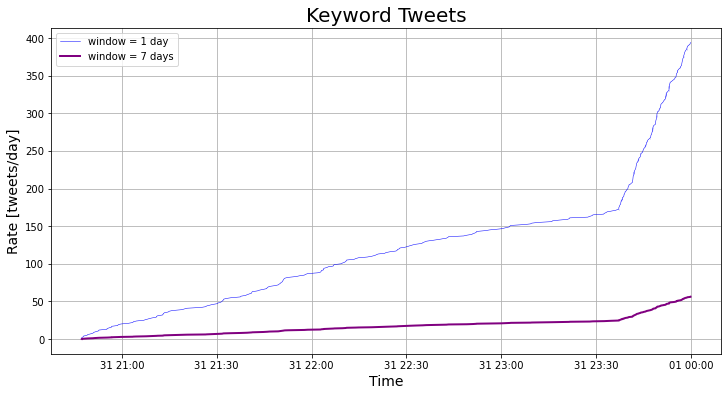

In [6]:

fig = plt.figure(figsize = (12,6))
sns.lineplot(data = df_keyword , x = 'created_at_datetime',y = 'rate_1D',label = 'window = 1 day',linewidth = .5,color = 'blue')
sns.lineplot(data = df_keyword , x = 'created_at_datetime',y = 'rate_7D',label = 'window = 7 days', linewidth = 2,color = 'purple')

plt.grid()
plt.xlabel("Time", fontsize = 14)

plt.ylabel("Rate [tweets/day]", fontsize = 14)
#plt.xlim(datetime.date(2020, 10, 1),datetime.date(2021,1,1))
#plt.ylim([0,30])
plt.title(f"Keyword Tweets",fontsize = 20)

plt.legend()
plt.show()

## Collect Screen Names of Keyword Tweets

The Twitter API only gives the ID of a tweet author.  To get the screen name we have to run the code below.  This code collects the screen names for a list of author IDs, then saves the screen names along with the tweets in a new database. This is a slow query, so it is advisable to instead get a smaller set of author IDs you are interested in, and then collect their screen names.

The user inputs are as follows:

`authorids` = list of author IDs as strings.  You can obtain the entire list from the `keyword_tweets` table, or you can input your own list manually.

`fname_db` = name of database where you want to save the keyword tweets plus the screen names

In [7]:
fname_db = f"data/spiderman_tweets"  #database filenmae

#load database of keyword_tweets into dataframe
df_keyword  = DB.fetch(table_name='keyword_tweets', path=fname_db)
print(f"{len(df_keyword)} keyword tweets")


394 keyword tweets


In [8]:
#get author IDs for keyword tweets table
authorids = df_keyword.author_id.unique().tolist()
print(f"userids has {len(authorids)} author ids")

userids has 358 author ids


userids has 3 author ids


In [9]:
#for loop that looks up the screen name (called username here) for each user ID
usernames = {}
c=0
print(f"We are going to collect screen names for {len(authorids)} users")
for authorid in authorids:
    username = User.id_to_username(user_id = authorid, token=0) #collect user profiles using Twitter API in a dataframe
    usernames[authorid] = username
    c+=1
    if c%100 ==0:print(f"user {c}/{len(authorids)}")
print(f"Collected screen names for {c} users")

We are going to collect screen names for 358 users
user 100/358
user 200/358
user 300/358
[2022-04-15 12:17:15.458] [INFO] [api:connect_to_endpoint:422] Sleeping
[2022-04-15 12:32:30.379] [ERROR] [api:id_to_username:455] (429, '{"title":"Too Many Requests","detail":"Too Many Requests","type":"about:blank","status":429}')
Collected screen names for 358 users


In [12]:
#look at the screen names
usernames

{'1326915319': 'slimsadia',
 '1066109785152634881': 'howlett_shawn',
 '1017614540727611392': 'ShellTurbo',
 '1307764239428464645': 'markiplieralt',
 '432217983': 'se7en_209',
 '1198802199104643079': 'kooeber',
 '1146245949200617472': 'Bchargoisthear1',
 '1358130750592348182': 'Pedrinhosnk',
 '4888924173': 'CrimsonTheFuck',
 '1334948716185174016': 'renluvsmilfs',
 '1420430470177755139': 'ItsNotJPG',
 '883687559389491200': 'Besuki9837',
 '1226745901038784513': 'Nyanpop180',
 '1273208486009212929': 'kensonthebear',
 '4886387435': '3rdstreet2',
 '25996734': 'Beedahsiga',
 '1308878660565372928': 'kirxile',
 '4819046482': 'Gamsterworld',
 '23128090': 'beng94',
 '1390529758597840900': 'currantcow',
 '858244945': 'BritishCPA',
 '1364648393910480897': 'UJStrikesBack',
 '1416947453920641024': 'pillallala',
 '2603652889': 'onetti98',
 '1309839953686396930': 'watercup654',
 '968274073': 'vvgselfportrait',
 '2734395441': 'AX_Splashy',
 '1350720267811758087': 'midnightIovrs',
 '1471556500002856968':

In [10]:
#add screen_name column to dataframe/database

col = []
for author_id in df_keyword.author_id:
    if author_id in usernames:
        col.append(usernames[author_id])
    else:
        col.append(np.NaN)
        
df_keyword['screen_name'] = col


In [11]:
df_keyword[['screen_name','text']].head()

screen_name  \
0      slimsadia   
1  howlett_shawn   
2     ShellTurbo   
3  markiplieralt   
4      se7en_209   

                                                                                          text  
0                    Got the note part ü•≤#SpiderManNoWayHome #SpiderMan https://t.co/xGEtVpwdMH  
1          @DrPopCultureBG I remember the Spiderman 1975 issue, not the others so much though.  
2  @thwippy21 I've only seen that with miles morales lol I should consume more Spiderman media  
3                                                             @deadkeiji watch every spiderman  
4                                       Saw spiderman finally! üò≠üò≠üò≠üò≠üò≠üò≠üò≠üò≠üò≠üò≠üò≠üò≠üò≠ That is all . üò≠‚òπÔ∏è

### Update `"keyword_tweets"` Table

In [17]:
#delete old table
#DB.delete(table_name='keyword_tweets', path=fname_db)  

#save dataframe with screen names to table
#DB.write(table_name='keyword_tweets', path=fname_db, data=df_keyword)  #Save profiles to database


[2022-03-08 02:04:16.404] [INFO] [api:delete:25] Deleting table keyword_tweets
[2022-03-08 02:04:16.415] [INFO] [api:write:60] Writing 247 rows to table keyword_tweets


### Check `"keyword_tweets"` Table 

We will load the keyword tweet table into a dataframe and look at the rows that have screen names.

In [12]:
df_keyword = DB.fetch(table_name='keyword_tweets', path=fname_db)
print(f"{len(df_keyword)} keyword tweets")

df_keyword.loc[df_keyword.screen_name.isna()==False,['screen_name','text']].head()

394 keyword tweets


screen_name  \
0        None   
1        None   
2        None   
3        None   
4        None   

                                                                                          text  
0                    Got the note part ü•≤#SpiderManNoWayHome #SpiderMan https://t.co/xGEtVpwdMH  
1          @DrPopCultureBG I remember the Spiderman 1975 issue, not the others so much though.  
2  @thwippy21 I've only seen that with miles morales lol I should consume more Spiderman media  
3                                                             @deadkeiji watch every spiderman  
4                                       Saw spiderman finally! üò≠üò≠üò≠üò≠üò≠üò≠üò≠üò≠üò≠üò≠üò≠üò≠üò≠ That is all . üò≠‚òπÔ∏è

# Collect User Profiles

The code below allows you to collect Twitter profiles from specific users.  The tweets will be saved to a database with filename `fname_db` in a table called `"users"`.  

The user inputs are as follows:

1. `fname_db` = the database filename where you want to store the profiles.  Do not add the `".db"` suffix.

3. `screen_names`  = a list of the screen name you want profiles for.  Even if you have one screen name, it must still be in a list.





In [13]:
fname_db = "data/spiderman_tweets"
screen_names =['TomHolland1996', 'itsagarfield', 'TobeyMaguire']


In [28]:
#If you want a fresh table, delete the existing table.  Be careful, because this will erase your data.
#Uncomment the line below to delete the existing table.

#DB.delete(table_name='users', path=fname_db)

In [14]:
#collect user profiles
df_profiles = User.user_info(screen_names)  #collect user profiles using Twitter API in a dataframe

#write profiles to users table
DB.write(table_name='users', path=fname_db, data=df_profiles)  #Save profiles to database

#look at head of table
df_profiles.head()

[2022-04-15 12:42:31.673] [INFO] [api:write:61] Writing 3 rows to table users


created_at             name        username  \
0  2012-07-01T18:29:25.000Z      Tom Holland  TomHolland1996   
1  2014-04-16T22:21:06.000Z  Andrew Garfield    itsagarfield   
2  2011-08-25T16:32:51.000Z    Tobey Maguire    TobeyMaguire   

                             description          id         location  \
0                                          624056226             Home   
1  Andrew Garfield Official Twitter Page  2448154418              NaN   
2                   Actor, Producer, Dad   361961997  Los Angeles, CA   

   followers_count  following_count  listed_count  tweet_count  
0          7326319               96          6125         1359  
1             6236              704             5           58  
2           399065               20           641           23

## Check `"users"` Table

In [15]:
df_profiles = DB.fetch(table_name='users', path=fname_db)  
df_profiles.head()

created_at             name     screen_name  \
0  2012-07-01T18:29:25.000Z      Tom Holland  TomHolland1996   
1  2014-04-16T22:21:06.000Z  Andrew Garfield    itsagarfield   
2  2011-08-25T16:32:51.000Z    Tobey Maguire    TobeyMaguire   
3  2012-07-01T18:29:25.000Z      Tom Holland  TomHolland1996   
4  2014-04-16T22:21:06.000Z  Andrew Garfield    itsagarfield   

                             description          id         location  \
0                                          624056226             Home   
1  Andrew Garfield Official Twitter Page  2448154418             None   
2                   Actor, Producer, Dad   361961997  Los Angeles, CA   
3                                          624056226             Home   
4  Andrew Garfield Official Twitter Page  2448154418             None   

   followers_count  following_count  listed_count  tweet_count  
0          7321389               95          6115         1359  
1             6227              704             5           58  
2           399002               20           641           23  
3          7326319               96          6125         1359  
4             6236              704             5           58

# Collect User Tweets

The code below allows you to collect tweets of specific users.  The tweets will be saved to a database with filename `fname_db` in a table called `"user_tweets"`.  

The user inputs are as follows:

1. `fname_db` = the database filename where you want to store the tweets.  Do not add the `".db"` suffix.

2. `max_results` = the total number of tweets you want to collect per user.

3. `screen_names`  = a list of screen names you want to search for.  Even if you have one screen name, it must still be in a list.

4. `start_date` = string of the earliest date of tweets you want.  Should be in `yyyy-mm-dd` format. (This doesn't seem to work for user tweets).

5. `end_date` = string of the latest date of tweets you want.  Should be in `yyyy-mm-dd` format.  (This doesn't seem to work for user tweets).



In [16]:
fname_db = "data/spiderman_tweets"
screen_names =['TomHolland1996', 'itsagarfield', 'TobeyMaguire']
max_results = 100
start_date = '2021-12-01'   
end_date = '2022-01-01'


In [32]:
#If you want a fresh table, delete the existing table.  Be careful, because this will erase your data.
#Uncomment the line below to delete the existing table.


#DB.delete(table_name='user_tweets', path=fname_db)


In [19]:
for screen_name in screen_names: 
    print(f"Collecting tweets for {screen_name}")
    user_id =  User.user_info([screen_name]).id.values[0]
    df_ut = Tweet.fetch_user_tweets(user_id, start_date, end_date,max_results)
    
    #add in a screen_name column for convenience
    df_ut['screen_name']= screen_name
    
    #write dataframe to table
    DB.write(table_name='user_tweets', path=fname_db, data=df_ut)

TypeError: 'NoneType' object does not support item assignment

## Start from here -- Check `"user_tweets"` Table 

In [17]:
df_ut = DB.fetch(table_name='user_tweets', path=fname_db)

sns.countplot(data = df_ut, x = 'screen_name')
df_ut[['created_at','screen_name','text']].sample(n=4)

OperationalError: (sqlite3.OperationalError) no such table: user_tweets
[SQL: SELECT * FROM user_tweets]
(Background on this error at: http://sqlalche.me/e/13/e3q8)

# Collect User Followings

This code will collect the followings for a group of users.  

The user inputs are as follows:

1. `fname_db` = the database filename where you want to store the followings.  Do not add the `".db"` suffix.


2. `screen_names`  = a list of screen names you want to collect followings for.  Even if you have one screen name, it must still be in a list.

3. `max_following` = the maximum number of following to get per user.  If this value is large, the code will take longer to run if you have users with a massive following count.



In [59]:
fname_db = "data/lecture_13"

screen_names =['POTUS', 'BarackObama', 'FLOTUS']
max_following = 5


In [61]:
#If you want a fresh table, delete the existing table.  Be careful, because this will erase your data.
#Uncomment the line below to delete the existing table.


#DB.delete(table_name='following', path = fname_db)

In [62]:
#This code queries the Twitter API for the followings.  It can be VERY slow
df_following = Follow.fetch(users=screen_names, target_total = max_following, token_number = 0, kind='following')
df_following.head()

POTUS          WHCOVIDResponse,WHCommsDir,AmbRice46,JOD46,WHCOS
BarackObama        VP,POTUS,DemRedistrict,Merone,HillaryClinton
FLOTUS         LaCasaBlanca,WhiteHouse,SecondGentleman,VP,POTUS
dtype: object

In [63]:
#write dataframe to table
DB.write(table_name='following', path=fname_db, data=df_following)

[2022-03-08 02:09:48.214] [INFO] [api:write:60] Writing 3 rows to table following


## Check `"following"` Table

In [64]:
df_following = DB.fetch(table_name='following', path=fname_db)
df_following.head()

0                                                 1
0        POTUS  WHCOVIDResponse,WHCommsDir,AmbRice46,JOD46,WHCOS
1  BarackObama      VP,POTUS,DemRedistrict,Merone,HillaryClinton
2       FLOTUS  LaCasaBlanca,WhiteHouse,SecondGentleman,VP,POTUS

# Build Networks

We will created networkx objects for different networks and save them as pickle files.

## Build Follower Network From Database

This code creates the networkx object for the follower network from the database.  

The user inputs are as follows:


1. `fname_db` = database filename where you stored the followings.  Do not add the `".db"` suffix.


2. `fname_following_network` = filename to save follower network to (should end in `".pickle"`)


In [65]:
fname_db = "data/lecture_13"
fname_following_network = "data/lecture_13_following_network.pickle"

In [66]:
df_following = DB.fetch(table_name='following', path=fname_db)

Gf = nx.DiGraph()
V = set(df_following[0].tolist())
for row in zip(df_following[0], df_following[1]):
    nb = row[1].split(",")
    node = row[0]
    Gf.add_node(node)
    for u in nb:
        if u in V:
            Gf.add_edge(u,node)

nx.write_gpickle(Gf,fname_following_network)

### Draw Following Network (If Not Too Big)

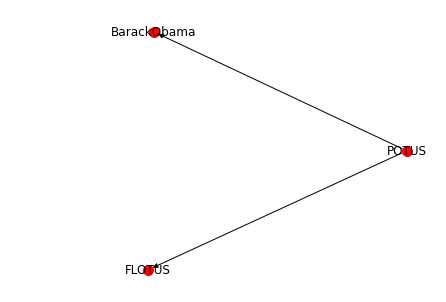

In [67]:
Gf = nx.read_gpickle(fname_following_network)

nv_max = 100  #max number of nodes to draw for
nv = Gf.number_of_nodes()
if nv<nv_max:
    pos = nx.kamada_kawai_layout(Gf.to_undirected())
    nx.draw(Gf,pos,node_size = 100, node_color = 'red', with_labels = True)
    
else: print(f"Network has {nv} nodes, which is more than {nv_max}")

## Build Interaction Network From Keyword Tweets

We can build an interaction network from the tweets in the `keyword_tweets` table using the function `interaction_network_from_tweets`.
The interaction network includes retweets, replies, and regular mentions of other users.  Our edge convention points to the person tweeting from the person being mentioned in the tweet. 

The user inputs are as follows:

1. `fname_db` = database filename where you stored the keyword tweets.  Do not add the `".db"` suffix.

2. `fname_interaction_network` = name of the file where you will save the interaction network.  Make sure it ends with `".pickle"`.

In [40]:
fname_db = 'data/lecture_13'
fname_interaction_network = 'data/lecture_13_interaction_network.pickle'


In [41]:
df_keyword= DB.fetch(table_name='keyword_tweets', path=fname_db)
G = interaction_network_from_tweets(df_keyword)
nx.write_gpickle(G, fname_interaction_network)

G has 563 nodes and 409 edges


### Draw Interaction Network (If Not Too Big)

In [68]:
edge_color = 'purple'
background_color = 'black'
edge_width = .1
node_size = 10
node_color = 'red'

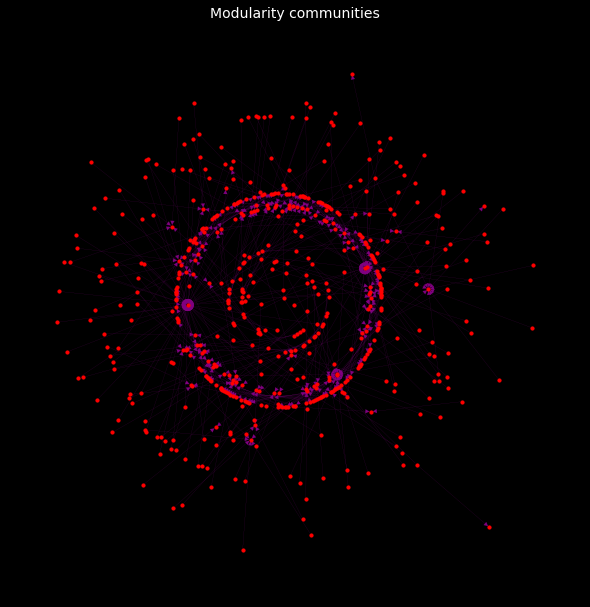

In [71]:
G = nx.read_gpickle(fname_interaction_network)

nv_max = 1000
nv = G.number_of_nodes()

if nv<nv_max:
    pos = nx.kamada_kawai_layout(G.to_undirected())  #position of each node in the network
    fig = plt.figure(figsize=(8,8))
    nx.draw(G, pos, node_color = node_color, 
            width= edge_width, 
            edge_color=edge_color,
            node_size=node_size,
           with_labels=False,
            font_color = 'white')
    fig.set_facecolor(background_color)
    plt.title("Modularity communities",color = 'white',fontsize = 14)
    plt.show()
    
else: print(f"Network has {nv} nodes, which is more than {nv_max}")

### Centrality calculation

We can look at the nodes with the highest network centralities.

In [43]:
Din = nx.in_degree_centrality(G)
Dout = nx.out_degree_centrality(G)
CC = nx.closeness_centrality(G.reverse())  #reverse edges to match networx convention
BC = nx.betweenness_centrality(G)
EC = nx.eigenvector_centrality(G.reverse(),max_iter = 1000)  #reverse edges to match networx convention

dictionary_list = []
for author_id in Din.keys():
    screen_name = G.nodes[author_id]['username']
    row = {'author_id':author_id,
           'screen_name':screen_name,
          'out_degree_centrality':Dout[author_id],
          'closeness_centrality':CC[author_id],
          'betweenness_centrality':BC[author_id],
          'eigenvector_centrality':EC[author_id],
          'in_degree_centrality':Din[author_id]}
    dictionary_list.append(row)
df_centrality = pd.DataFrame(dictionary_list)
df_centrality.sort_values(by = ['out_degree_centrality'],ascending = False).head()



author_id      screen_name  out_degree_centrality  \
50   1349149096909668363            POTUS               0.010676   
201             18208354         joerogan               0.007117   
106              1917731          thehill               0.003559   
254  1181006491030974465    Ninnysflowers               0.003559   
432   993137216309383169  NathanMackBrown               0.003559   

     closeness_centrality  betweenness_centrality  eigenvector_centrality  \
50               0.010676                     0.0                0.272264   
201              0.007117                     0.0                0.181616   
106              0.003559                     0.0                0.090968   
254              0.003559                     0.0                0.090968   
432              0.003559                     0.0                0.090968   

     in_degree_centrality  
50                    0.0  
201                   0.0  
106                   0.0  
254                   0.0  
432                   0.0

# Build Similarity Network

We can build a similarity network from the interaction network.  In this network there is an edge between a pair of nodes of their similarity exceeds a minimum threshold.  For similarity, we use a measure called the Jaccard Coefficient (https://en.wikipedia.org/wiki/Jaccard_index).  The similarity network is useful for finding communities.

The user inputs are as follows:

1. `fname_interaction_network` = name of the file where you saved the interaction network.  Make sure it ends with `".pickle"`.

2. `fname_similarity_network` = name of the file where you will save the similarity network.  Make sure it ends with `".pickle"`.

3. `ne_max` = the maximum number of edges in the similarity network

4. `jmin` = minimum value of jaccard coefficient of an edge in order to keep it in the similarity network

In [44]:
fname_interaction_network = 'data/lecture_13_interaction_network.pickle'
fname_similarity_network = 'data/lecture_13_similarity_network.pickle'

ne_max = 1e10  #max number of edges in network
jmin = 0.5  #minimum value of jaccard coefficient to keep in network

In [45]:
%%time
G = nx.read_gpickle(fname_interaction_network)

Gsim = nx.Graph()
preds = nx.jaccard_coefficient(G.to_undirected())
ne=0
for c, x in enumerate(preds):
    if x[2]>jmin:
        Gsim.add_edge(x[0],x[1],weight=x[2])
        ne+=1
    if c%1e6==0:
        print(f"node pair {c}, {ne} edges formed in similarity network")
    if ne>ne_max:break

print(f"Similarity network has {Gsim.number_of_nodes()} nodes and {Gsim.number_of_edges()} edges over {c} node pairs")


node pair 0, 0 edges formed in similarity network
Similarity network has 293 nodes and 1662 edges over 157793 node pairs
Wall time: 1.13 s


In [46]:
#save similarity network
nx.write_gpickle(Gsim, fname_similarity_network)


### Find Communities Using Similarity Network

We can find the modularity communities in the similarity network and plot their sizes.

In [49]:
Gsim = nx.read_gpickle(fname_similarity_network)

Comm = nx_comm.greedy_modularity_communities(Gsim.to_undirected())
C = []
V = []
for count,comm in enumerate(Comm):
    for v in comm:
        C.append(count)
        V.append(v)
        
df_mod = pd.DataFrame({'screen_name':V, 'community':C})
ncomm_mod = len(df_mod.community.unique())
print(f"{ncomm_mod} modularity communities")

79 modularity communities


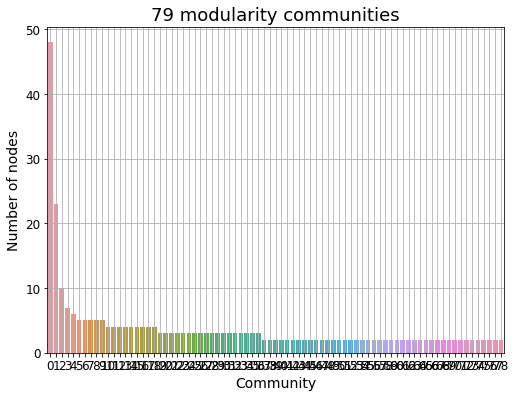

In [52]:
#plot modularity community sizes
fig = plt.figure(figsize = (18,6))
plt.subplot(1,2,1)
ax = sns.countplot(data=df_mod, x="community")
plt.xlabel("Community", fontsize = 14)
plt.ylabel("Number of nodes", fontsize = 14)
plt.title(f"{ncomm_mod} modularity communities", fontsize = 18)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.grid()

### Draw Similarity Network (If Not Too Big)

In [53]:
Colors = [np.random.uniform(0,1,3) for _ in range(ncomm_mod)]


In [55]:
node_color_mod = [Colors[df_mod.community[df_mod.screen_name==node].values[0]] for node in Gsim.nodes()]



In [56]:
edge_color = 'purple'
background_color = 'black'
edge_width = .1
node_size = 10

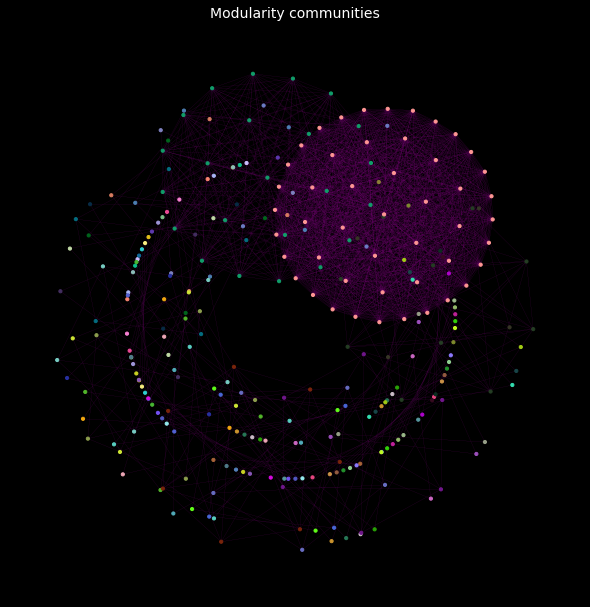

Wall time: 603 ms


In [73]:
%%time
nv_max = 1000
nv = Gsim.number_of_nodes()

if nv<nv_max:
    pos = nx.kamada_kawai_layout(Gsim.to_undirected())  #position of each node in the network
    fig = plt.figure(figsize=(8,8))
    nx.draw(Gsim, pos, node_color = node_color_mod, 
            width= edge_width, 
            edge_color=edge_color,
            node_size=node_size,
           with_labels=False,
            font_color = 'white')
    fig.set_facecolor(background_color)
    plt.title("Modularity communities",color = 'white',fontsize = 14)
    plt.show()
    
else: print(f"Network has {nv} nodes, which is more than {nv_max}")